# MVP: Detecção de URLs de Phishing com Machine Learning

**Universidade de Brasília - Departamento de Engenharia de Produção**  
**Professor:** Dr. Andre Luiz Marques Serrano  
**Aluno:** Helena Silveira Ventura - 190139501
**Data:** 20 de outubro de 2025

---

## 1. DEFINIÇÃO DO PROBLEMA

### 1.1 Descrição do Problema

Este projeto visa desenvolver um **modelo de machine learning capaz de classificar automaticamente URLs como legítimas ou de phishing**, contribuindo significativamente para a segurança digital e proteção de usuários.

### 1.2 Premissas e Hipóteses

**Hipóteses do Projeto:**

1. **Hipótese Principal:** Características extraídas das URLs (comprimento, presença de caracteres especiais, estrutura do domínio, uso de HTTPS) são suficientes para distinguir URLs legítimas de phishing com alta acurácia.


3. **Hipótese de Modelo:** Algoritmos de classificação baseados em árvores de decisão (Random Forest, Gradient Boosting, XGBoost) devem apresentar bom desempenho devido à natureza mista (categórica e numérica) dos features e à capacidade de capturar interações não-lineares.

### 1.3 Restrições e Condições

- **Dataset:** Utilizaremos um dataset público com features pré-extraídas das URLs
- **Escopo:** Foco em classificação binária (0 = legítima, 1 = phishing)
- **Abordagem:** Uso de modelos clássicos de machine learning (não Deep Learning)
- **Ferramentas:** Implementação em Python com bibliotecas scikit-learn, pandas, matplotlib
- **Validação:** Cross-validation com k=5 folds para garantir robustez dos resultados

### 1.4 Descrição do Dataset

O dataset utilizado contém URLs processadas com **features extraídas** que capturam características estruturais e lexicais relevantes para a detecção de phishing:

**Tipos de Features:**
- **Numéricas:** Comprimento da URL, número de pontos, hífens, barras, dígitos
- **Binárias:** Presença de IP, uso de HTTPS, existência de @ na URL
- **Categóricas:** TLD (Top Level Domain), presença de palavras suspeitas
- **Target:** Classificação binária (0 = URL legítima, 1 = URL de phishing)

O dataset será carregado diretamente via URL para garantir reprodutibilidade.

## 2. CONFIGURAÇÃO DO AMBIENTE

Primeiro, vamos instalar as bibliotecas necessárias e configurar o ambiente.

In [ ]:
# =============================================================================
# 1. CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÃO DE BIBLIOTECAS
# =============================================================================
# Bibliotecas fundamentais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Bibliotecas de Machine Learning - Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Bibliotecas de Machine Learning - Pipeline
from sklearn.pipeline import Pipeline

# Bibliotecas de Machine Learning - Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc, make_scorer
)

# Bibliotecas de Machine Learning - Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print("="*70)
print("✅ BIBLIOTECAS IMPORTADAS COM SUCESSO!")
print("="*70)
print(f"📅 Data e hora de execução: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"🐍 Versão do Python: {sys.version.split()[0]}")
print(f"📊 Versão do Pandas: {pd.__version__}")
print(f"🔢 Versão do NumPy: {np.__version__}")
print(f"🤖 Versão do Scikit-learn: {sklearn.__version__}")
print("="*70)


✅ BIBLIOTECAS IMPORTADAS COM SUCESSO!
📅 Data e hora de execução: 20/10/2025 23:30:13


NameError: name 'sys' is not defined


## 3. CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS

Nesta seção, carregaremos o dataset de URLs de phishing e realizaremos uma análise exploratória inicial para compreender a estrutura dos dados, identificar possíveis problemas (valores ausentes, outliers) e visualizar a distribuição das classes.

**Fonte dos Dados:** O dataset será carregado diretamente via URL pública, eliminando a necessidade de downloads manuais e garantindo a reprodutibilidade do notebook.

In [ ]:
# =============================================================================
# 2. CARREGAMENTO DOS DADOS
# =============================================================================

# URL do dataset (usando repositório público com dados de phishing)
dataset_url = "https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/dataset_full.csv"

print("🔄 Carregando dataset...")
print(f"📍 URL: {dataset_url}")
print("-" * 70)

try:
    # Carregar dataset
    df = pd.read_csv(dataset_url)

    print("✅ Dataset carregado com sucesso!")
    print(f"📊 Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
    print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

except Exception as e:
    print(f"❌ Erro ao carregar dataset: {e}")
    raise

print("="*70)

🔄 Carregando dataset...
📍 URL: https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/dataset_full.csv
----------------------------------------------------------------------
✅ Dataset carregado com sucesso!
📊 Dimensões: 88,647 linhas × 112 colunas
💾 Tamanho em memória: 75.75 MB


In [ ]:
print("\n" + "="*70)
print("📋 PRIMEIRAS 10 LINHAS DO DATASET")
print("="*70)
display(df.head(10))

print("\n" + "="*70)
print("📋 ÚLTIMAS 5 LINHAS DO DATASET")
print("="*70)
display(df.tail())


📋 PRIMEIRAS 10 LINHAS DO DATASET


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.458436,-1,25535,9,355,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,27,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.710173,0,13446,-1,-1,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,28,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,


📋 ÚLTIMAS 5 LINHAS DO DATASET


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.135186,0,8560,5509,334,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,34,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.397981,0,26496,5046,431,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.745030,0,394695,1844,712,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.307057,0,47583,-1,-1,1,1,1,52,1,0,0,0,0,1
88646,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.459014,0,47846,300,64,1,4,0,299,0,0,0,0,0,0


In [ ]:
print("\n" + "="*70)
print("🔍 VERIFICAÇÃO DE VALORES AUSENTES")
print("="*70)

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Ausentes': missing,
    'Percentual (%)': missing_percent
})

missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values(
    'Valores Ausentes', ascending=False
)

if len(missing_df) == 0:
    print("✅ Não há valores ausentes no dataset!")
else:
    print("⚠️  Valores ausentes encontrados:")
    display(missing_df)

print(f"\n📊 Total de valores ausentes: {missing.sum():,}")
print(f"📊 Percentual total: {(missing.sum() / df.size) * 100:.2f}%")


🔍 VERIFICAÇÃO DE VALORES AUSENTES
✅ Não há valores ausentes no dataset!

📊 Total de valores ausentes: 0
📊 Percentual total: 0.00%


## 4. Análise da Variável Target

Vamos analisar a variável target e criar uma versão binária para classificação.

In [ ]:
print("\n" + "="*70)
print("🎯 IDENTIFICAÇÃO DA VARIÁVEL TARGET")
print("="*70)

# Identificar coluna target (padrões comuns)
possible_targets = ['label', 'class', 'target', 'phishing', 'result', 'status']
target_col = None

for col in possible_targets:
    if col in df.columns.str.lower():
        target_col = df.columns[df.columns.str.lower() == col][0]
        break

# Se não encontrar, assumir última coluna
if target_col is None:
    target_col = df.columns[-1]
    print(f"⚠️  Coluna target assumida automaticamente: '{target_col}'")
else:
    print(f"✅ Coluna target identificada: '{target_col}'")

print(f"\n📊 Valores únicos na target: {df[target_col].nunique()}")
print(f"📊 Valores: {df[target_col].unique()}")


🎯 IDENTIFICAÇÃO DA VARIÁVEL TARGET
✅ Coluna target identificada: 'phishing'

📊 Valores únicos na target: 2
📊 Valores: [1 0]


In [ ]:
# =============================================================================
# ANÁLISE DA DISTRIBUIÇÃO DA VARIÁVEL TARGET
# =============================================================================

print("\n" + "="*70)
print("📊 DISTRIBUIÇÃO DA VARIÁVEL TARGET")
print("="*70)

# Contagem de classes
target_counts = df[target_col].value_counts().sort_index()
target_percent = df[target_col].value_counts(normalize=True).sort_index() * 100

# Criar DataFrame com estatísticas
target_stats = pd.DataFrame({
    'Classe': target_counts.index,
    'Quantidade': target_counts.values,
    'Percentual (%)': target_percent.values
})

display(target_stats)

# Calcular balanceamento
balanceamento = target_counts.min() / target_counts.max() * 100
print(f"\n⚖️  Balanceamento das classes: {balanceamento:.2f}%")

if balanceamento < 70:
    print("⚠️  Dataset desbalanceado! Considerar técnicas de balanceamento.")
else:
    print("✅ Dataset relativamente balanceado.")

# Mapear classes para nomes legíveis (se necessário)
class_names = {0: 'Legítima', 1: 'Phishing', -1: 'Legítima'}


📊 DISTRIBUIÇÃO DA VARIÁVEL TARGET


,Classe,Quantidade,Percentual (%)
0,0,58000,65.428046
1,1,30647,34.571954



⚖️  Balanceamento das classes: 52.84%
⚠️  Dataset desbalanceado! Considerar técnicas de balanceamento.


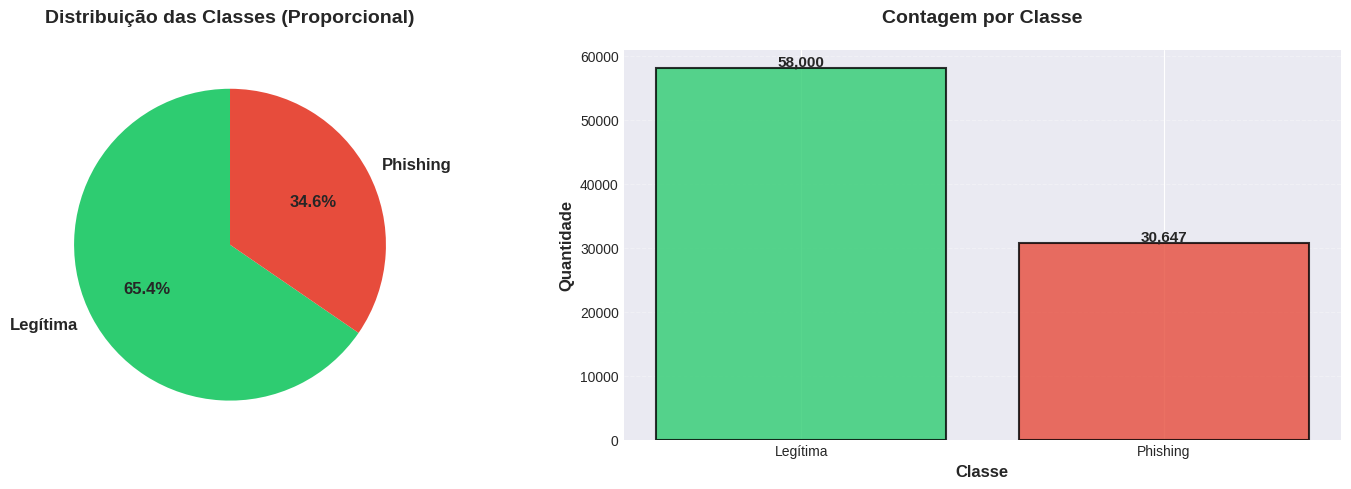


✅ Visualização da distribuição da variável target concluída!


In [ ]:
# =============================================================================
# VISUALIZAÇÃO DA DISTRIBUIÇÃO DA TARGET
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de pizza
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(
    target_counts.values,
    labels=[class_names.get(x, x) for x in target_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
axes[0].set_title('Distribuição das Classes (Proporcional)',
                  fontsize=14, fontweight='bold', pad=20)

# Gráfico de barras
bar_plot = axes[1].bar(
    range(len(target_counts)),
    target_counts.values,
    color=colors,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)
axes[1].set_xticks(range(len(target_counts)))
axes[1].set_xticklabels([class_names.get(x, x) for x in target_counts.index])
axes[1].set_title('Contagem por Classe', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Quantidade', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, bar in enumerate(bar_plot):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Visualização da distribuição da variável target concluída!")

## 5. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

A Análise Exploratória de Dados (EDA) é uma etapa crucial para compreender profundamente o dataset antes da modelagem. Nesta seção, realizaremos:

1. **Separação de Features e Target:** Dividir o dataset em variáveis preditoras (X) e variável resposta (y)
2. **Análise de Correlação:** Identificar relações lineares entre features e com a target
3. **Identificação de Multicolinearidade:** Detectar features altamente correlacionadas
4. **Análise Univariada:** Examinar a distribuição das principais features
5. **Feature Importance Preliminar:** Identificar features mais relevantes para classificação

Esta análise nos permitirá tomar decisões informadas sobre feature selection, transformação de dados e escolha de algoritmos.

In [ ]:
# =============================================================================
# 3. SEPARAÇÃO DE FEATURES E TARGET
# =============================================================================

print("="*70)
print("🔍 ANÁLISE EXPLORATÓRIA DE DADOS")
print("="*70)

# Separar features (X) e target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n📊 Features disponíveis: {X.shape[1]}")
print(f"📊 Número de amostras: {X.shape[0]:,}")
print(f"\n✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")

# Listar todas as features
print(f"\n📋 Lista de Features:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

🔍 ANÁLISE EXPLORATÓRIA DE DADOS

📊 Features disponíveis: 111
📊 Número de amostras: 88,647

✅ Features (X) shape: (88647, 111)
✅ Target (y) shape: (88647,)

📋 Lista de Features:
    1. qty_dot_url
    2. qty_hyphen_url
    3. qty_underline_url
    4. qty_slash_url
    5. qty_questionmark_url
    6. qty_equal_url
    7. qty_at_url
    8. qty_and_url
    9. qty_exclamation_url
   10. qty_space_url
   11. qty_tilde_url
   12. qty_comma_url
   13. qty_plus_url
   14. qty_asterisk_url
   15. qty_hashtag_url
   16. qty_dollar_url
   17. qty_percent_url
   18. qty_tld_url
   19. length_url
   20. qty_dot_domain
   21. qty_hyphen_domain
   22. qty_underline_domain
   23. qty_slash_domain
   24. qty_questionmark_domain
   25. qty_equal_domain
   26. qty_at_domain
   27. qty_and_domain
   28. qty_exclamation_domain
   29. qty_space_domain
   30. qty_tilde_domain
   31. qty_comma_domain
   32. qty_plus_domain
   33. qty_asterisk_domain
   34. qty_hashtag_domain
   35. qty_dollar_domain
   36. qty_


📊 MATRIZ DE CORRELAÇÃO
✅ Matriz de correlação calculada: (111, 111)


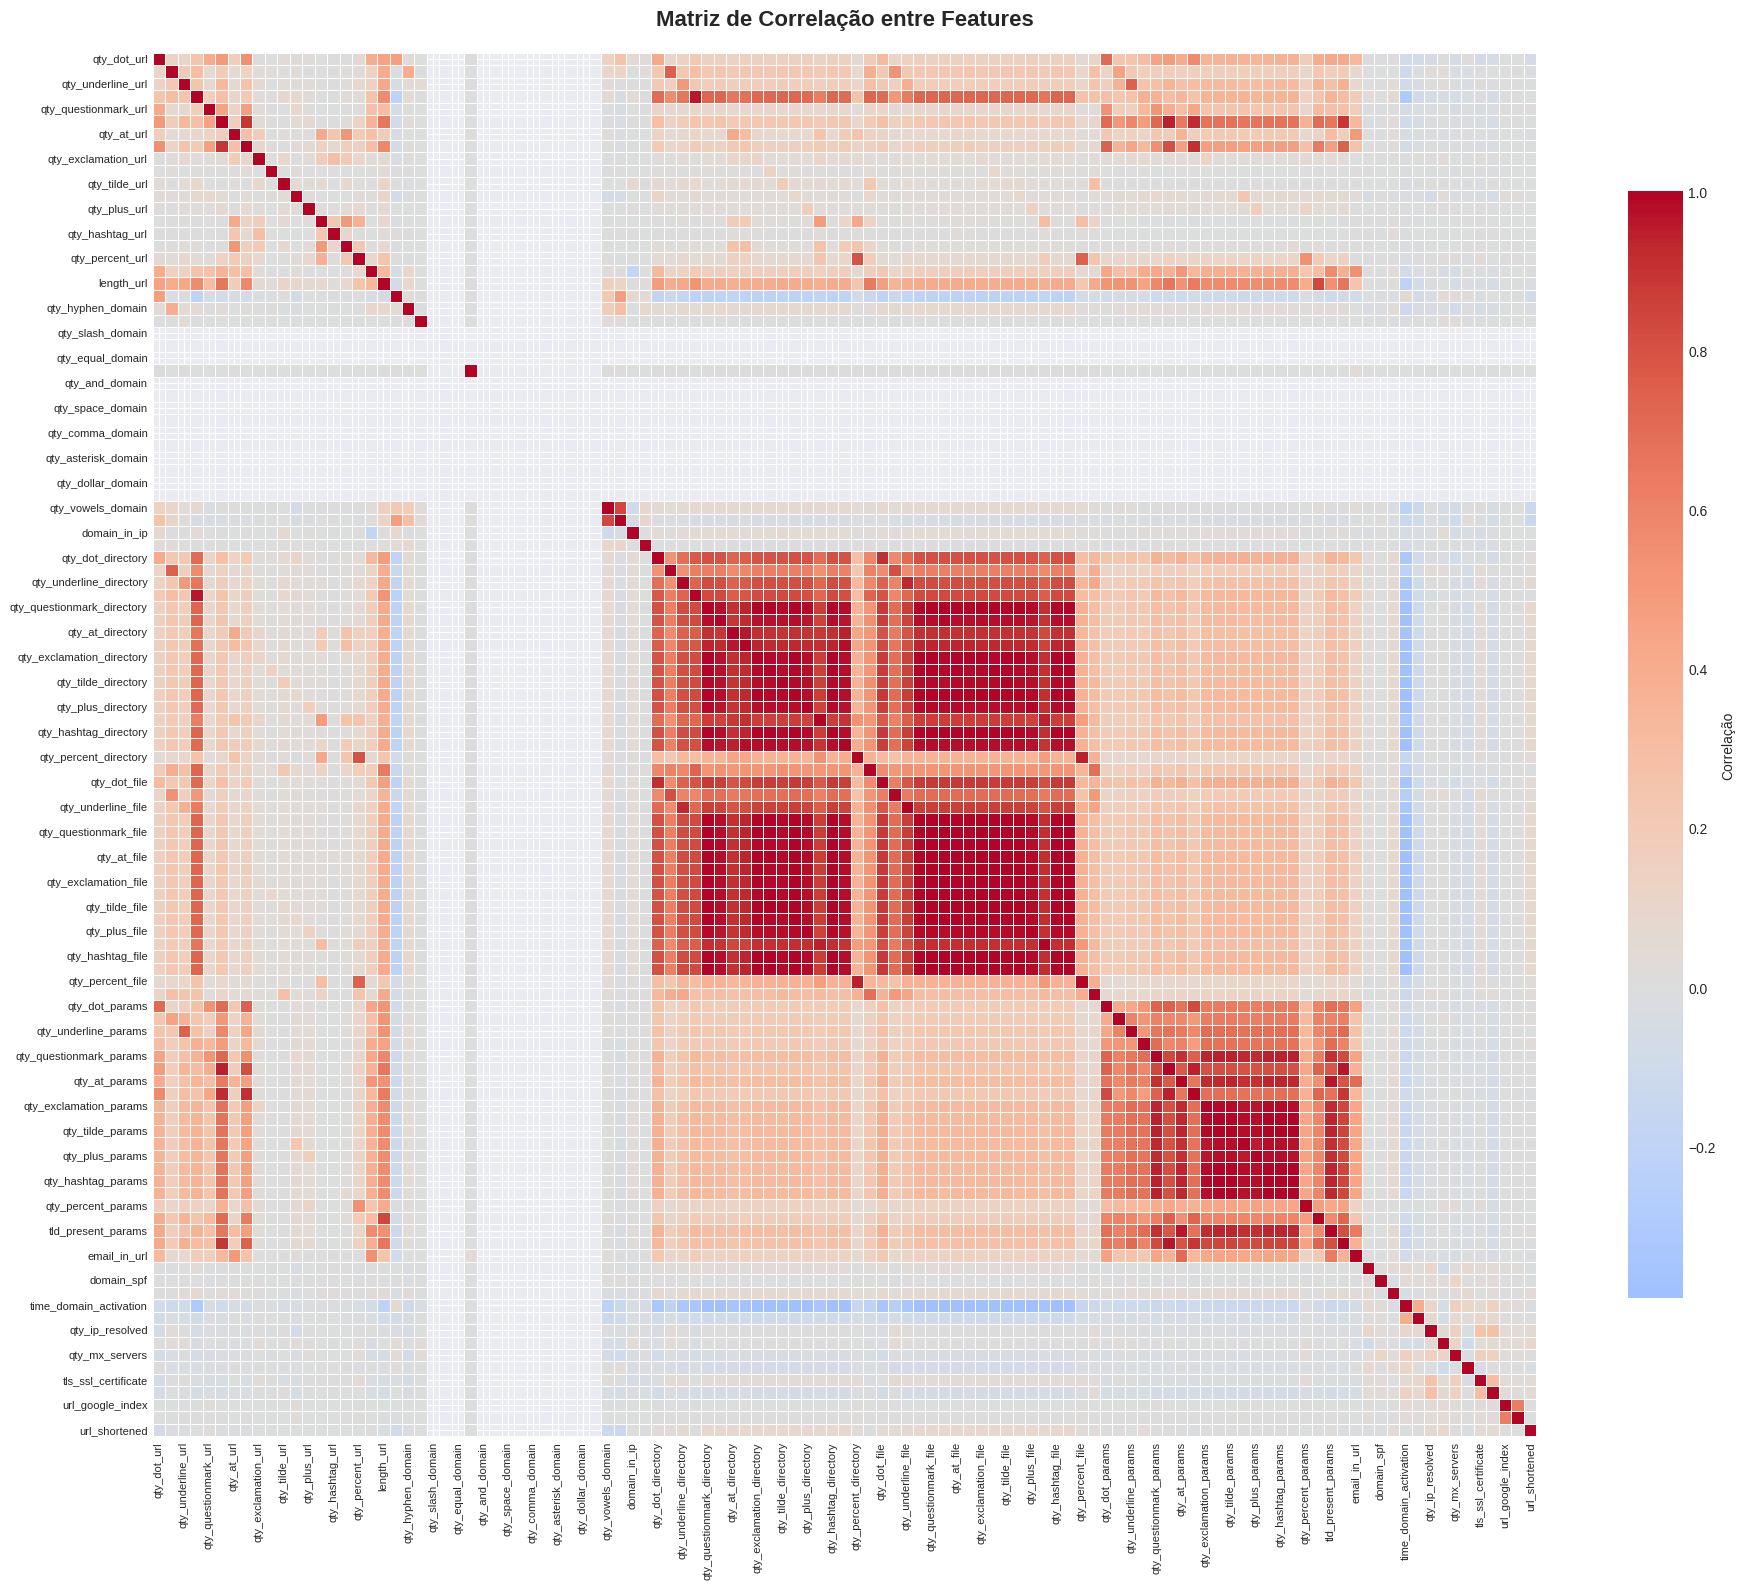

In [ ]:
# =============================================================================
# ANÁLISE DE CORRELAÇÃO
# =============================================================================

print("\n" + "="*70)
print("📊 MATRIZ DE CORRELAÇÃO")
print("="*70)

# Calcular matriz de correlação
correlation_matrix = X.corr()

print(f"✅ Matriz de correlação calculada: {correlation_matrix.shape}")

# Visualizar matriz de correlação
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Não anotar valores (muitas features)
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlação"}
)
plt.title('Matriz de Correlação entre Features',
         fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# IDENTIFICAÇÃO DE FEATURES ALTAMENTE CORRELACIONADAS
# =============================================================================

print("\n" + "="*70)
print("🔗 IDENTIFICAÇÃO DE MULTICOLINEARIDADE")
print("="*70)

# Threshold para correlação alta
threshold = 0.9

# Encontrar pares de features altamente correlacionadas
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            highly_correlated_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlação': corr_value
            })

if highly_correlated_pairs:
    print(f"⚠️  Encontradas {len(highly_correlated_pairs)} pares com correlação > {threshold}")
    highly_corr_df = pd.DataFrame(highly_correlated_pairs)
    highly_corr_df = highly_corr_df.sort_values('Correlação',
                                                 key=abs,
                                                 ascending=False)
    display(highly_corr_df.head(10))
    print("\n💡 Considerar remover uma feature de cada par para reduzir multicolinearidade.")
else:
    print(f"✅ Não há pares de features com correlação > {threshold}")
    print("✅ Multicolinearidade controlada!")


🔗 IDENTIFICAÇÃO DE MULTICOLINEARIDADE
⚠️  Encontradas 337 pares com correlação > 0.9


,Feature 1,Feature 2,Correlação
27,qty_questionmark_directory,qty_hashtag_file,1.0
28,qty_questionmark_directory,qty_dollar_file,1.0
17,qty_questionmark_directory,qty_questionmark_file,1.0
279,qty_hashtag_file,qty_dollar_file,1.0
16,qty_questionmark_directory,qty_slash_file,1.0
176,qty_hashtag_directory,qty_questionmark_file,1.0
14,qty_questionmark_directory,qty_hashtag_directory,1.0
187,qty_hashtag_directory,qty_dollar_file,1.0
202,qty_slash_file,qty_questionmark_file,1.0
186,qty_hashtag_directory,qty_hashtag_file,1.0



💡 Considerar remover uma feature de cada par para reduzir multicolinearidade.



🎯 CORRELAÇÃO DAS FEATURES COM A TARGET
Top 15 Features mais correlacionadas com a target:

    1. qty_slash_directory                      → 0.7465
    2. qty_questionmark_directory               → 0.7456
    3. qty_dollar_file                          → 0.7456
    4. qty_questionmark_file                    → 0.7456
    5. qty_slash_file                           → 0.7456
    6. qty_hashtag_file                         → 0.7456
    7. qty_hashtag_directory                    → 0.7456
    8. qty_at_file                              → 0.7455
    9. qty_exclamation_file                     → 0.7451
   10. qty_and_file                             → 0.7449
   11. qty_tilde_file                           → 0.7447
   12. qty_equal_file                           → 0.7437
   13. qty_space_file                           → 0.7427
   14. qty_comma_file                           → 0.7424
   15. qty_comma_directory                      → 0.7423


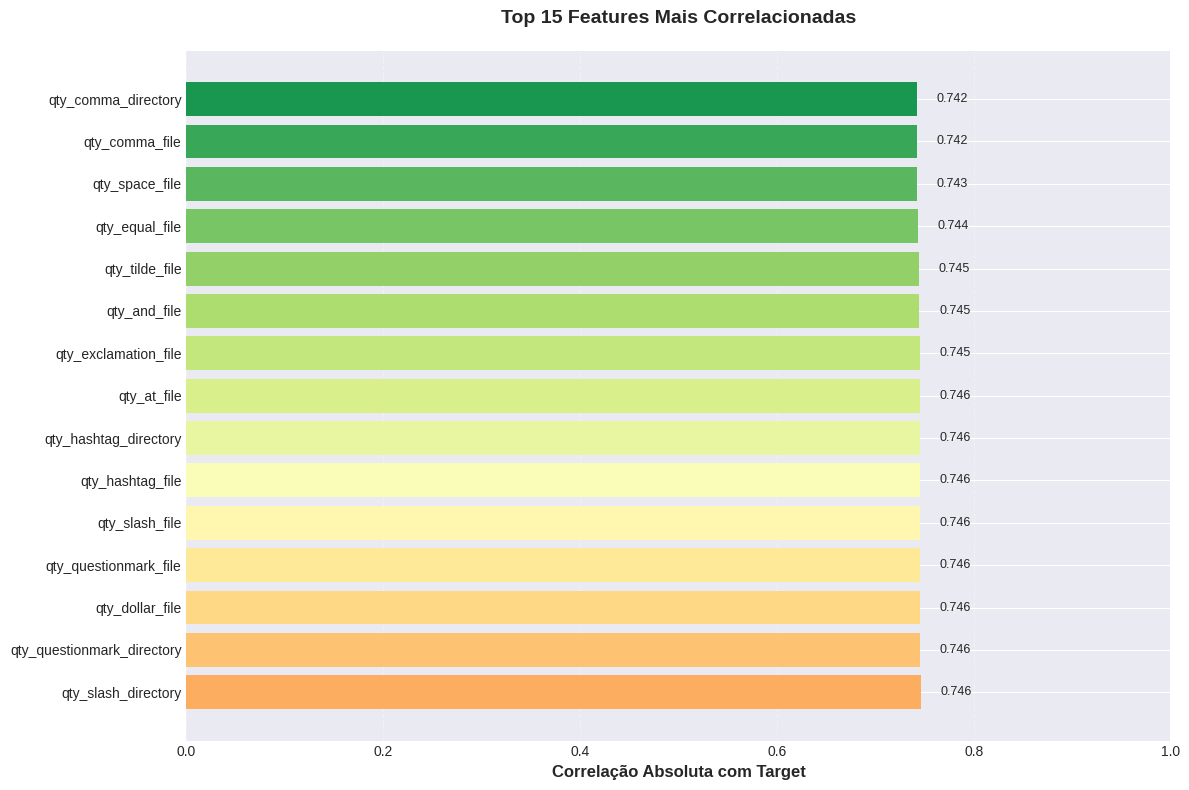

In [ ]:
# =============================================================================
# CORRELAÇÃO COM A VARIÁVEL TARGET
# =============================================================================

print("\n" + "="*70)
print("🎯 CORRELAÇÃO DAS FEATURES COM A TARGET")
print("="*70)

# Calcular correlação com target
correlations_with_target = X.corrwith(y).abs().sort_values(ascending=False)

# Selecionar top 15 features
top_n = min(15, len(correlations_with_target))
top_features = correlations_with_target.head(top_n)

print(f"Top {top_n} Features mais correlacionadas com a target:\n")
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"   {i:2d}. {feature:40s} → {corr:.4f}")

# Visualizar
plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlação Absoluta com Target', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Features Mais Correlacionadas',
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlim([0, 1])

# Adicionar valores
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Salvar top features para uso posterior
selected_top_features = top_features.head(10).index.tolist()


📊 DISTRIBUIÇÃO DAS PRINCIPAIS FEATURES POR CLASSE


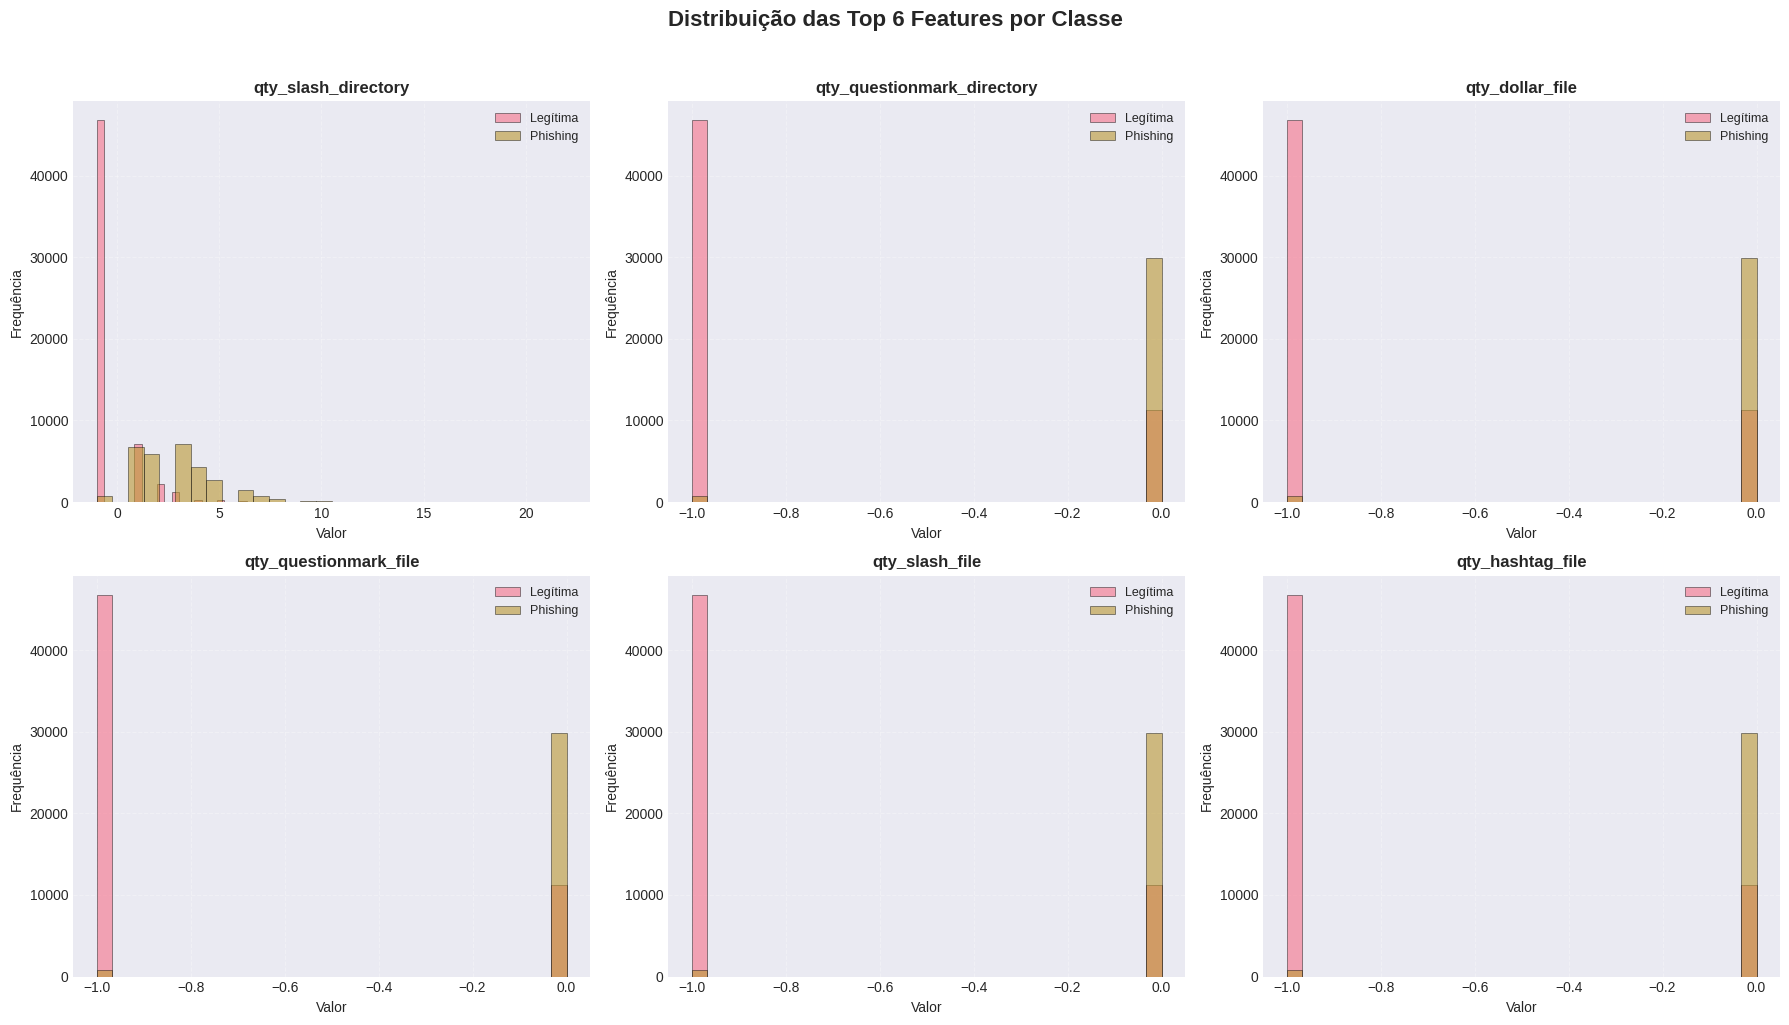

✅ Análise univariada concluída para 6 features


In [ ]:
# =============================================================================
# ANÁLISE UNIVARIADA - DISTRIBUIÇÃO DAS PRINCIPAIS FEATURES
# =============================================================================

print("\n" + "="*70)
print("📊 DISTRIBUIÇÃO DAS PRINCIPAIS FEATURES POR CLASSE")
print("="*70)

# Selecionar top 6 features para visualização
features_to_plot = correlations_with_target.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]

    # Plotar distribuição para cada classe
    for label in sorted(y.unique()):
        class_data = X[y == label][feature]
        ax.hist(class_data, alpha=0.6, bins=30,
               label=class_names.get(label, f'Classe {label}'),
               edgecolor='black', linewidth=0.5)

    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Distribuição das Top 6 Features por Classe',
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"✅ Análise univariada concluída para {len(features_to_plot)} features")

## 6. PREPARAÇÃO DOS DADOS

A preparação adequada dos dados é fundamental para o sucesso dos modelos de machine learning. Nesta seção, realizaremos:

### 6.1 Separação Treino/Teste

Utilizaremos a proporção **80/20** para divisão treino/teste, com **estratificação** para manter a proporção de classes em ambos os conjuntos. Isso garante que os dados de teste sejam representativos da distribuição real.

**Justificativa:**
- 80% treino fornece dados suficientes para treinamento robusto
- 20% teste fornece amostra significativa para avaliação
- Estratificação previne desbalanceamento nos conjuntos

### 6.2 Validação Cruzada (Cross-Validation)

**Faz sentido utilizar validação cruzada? SIM!**

**Justificativa:**

1. **Robustez:** Reduz o viés de uma divisão única treino/validação
2. **Melhor uso dos dados:** Aproveita todo o conjunto de treino para validação
3. **Avaliação mais confiável:** Fornece média e desvio padrão das métricas
4. **Otimização de hiperparâmetros:** Essencial para GridSearchCV
5. **Detecção de overfitting:** Permite identificar modelos que não generalizam bem

Utilizaremos **k=5 folds** com estratificação (StratifiedKFold) para manter a proporção de classes em cada fold.

### 6.3 Feature Selection

Realizaremos seleção de features usando múltiplas abordagens para identificar os atributos mais relevantes e reduzir dimensionalidade quando apropriado.

### 6.4 Transformação de Dados

Criaremos diferentes versões dos dados com transformações apropriadas e avaliaremos qual apresenta melhor performance.

In [ ]:
# =============================================================================
# 4. SEPARAÇÃO TREINO/TESTE
# =============================================================================

print("="*70)
print("⚙️  PREPARAÇÃO DOS DADOS")
print("="*70)

# Definir proporção de divisão
test_size = 0.2
random_state = 42

print(f"\n📊 Realizando divisão treino/teste...")
print(f"   • Proporção teste: {test_size*100:.0f}%")
print(f"   • Proporção treino: {(1-test_size)*100:.0f}%")
print(f"   • Random state: {random_state}")
print(f"   • Estratificação: Sim")

# Separar dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    stratify=y
)

print(f"\n✅ Divisão realizada com sucesso!")
print("\n" + "="*70)
print("📊 ESTATÍSTICAS DA DIVISÃO")
print("="*70)

# Estatísticas
print(f"\nConjunto de TREINO:")
print(f"   • Amostras: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Features: {X_train.shape[1]}")
print(f"   • Distribuição:")
for label in sorted(y_train.unique()):
    count = (y_train == label).sum()
    pct = count / len(y_train) * 100
    print(f"      - {class_names.get(label, label)}: {count:,} ({pct:.1f}%)")

print(f"\nConjunto de TESTE:")
print(f"   • Amostras: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   • Features: {X_test.shape[1]}")
print(f"   • Distribuição:")
for label in sorted(y_test.unique()):
    count = (y_test == label).sum()
    pct = count / len(y_test) * 100
    print(f"      - {class_names.get(label, label)}: {count:,} ({pct:.1f}%)")

print("="*70)

⚙️  PREPARAÇÃO DOS DADOS

📊 Realizando divisão treino/teste...
   • Proporção teste: 20%
   • Proporção treino: 80%
   • Random state: 42
   • Estratificação: Sim

✅ Divisão realizada com sucesso!

📊 ESTATÍSTICAS DA DIVISÃO

Conjunto de TREINO:
   • Amostras: 70,917 (80.0%)
   • Features: 111
   • Distribuição:
      - Legítima: 46,400 (65.4%)
      - Phishing: 24,517 (34.6%)

Conjunto de TESTE:
   • Amostras: 17,730 (20.0%)
   • Features: 111
   • Distribuição:
      - Legítima: 11,600 (65.4%)
      - Phishing: 6,130 (34.6%)


In [ ]:
# =============================================================================
# FEATURE SELECTION
# =============================================================================

print("\n" + "="*70)
print("🎯 SELEÇÃO DE FEATURES")
print("="*70)

print("\nAplicando múltiplos métodos de feature selection...")

# Método 1: SelectKBest com ANOVA F-statistic
print("\n1️⃣  ANOVA F-statistic (f_classif)")
selector_anova = SelectKBest(score_func=f_classif, k='all')
selector_anova.fit(X_train, y_train)
print("   ✅ Concluído")

# Método 2: SelectKBest com Mutual Information
print("2️⃣  Mutual Information (mutual_info_classif)")
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X_train, y_train)
print("   ✅ Concluído")

# Criar DataFrame com scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'ANOVA_Score': selector_anova.scores_,
    'MI_Score': selector_mi.scores_,
    'Correlation': correlations_with_target[X_train.columns]
})

# Normalizar scores para comparação
feature_scores['ANOVA_Norm'] = (feature_scores['ANOVA_Score'] - feature_scores['ANOVA_Score'].min()) / (feature_scores['ANOVA_Score'].max() - feature_scores['ANOVA_Score'].min())
feature_scores['MI_Norm'] = (feature_scores['MI_Score'] - feature_scores['MI_Score'].min()) / (feature_scores['MI_Score'].max() - feature_scores['MI_Score'].min())

# Score combinado (média dos métodos normalizados)
feature_scores['Combined_Score'] = (
    feature_scores['ANOVA_Norm'] +
    feature_scores['MI_Norm'] +
    feature_scores['Correlation']
) / 3

feature_scores = feature_scores.sort_values('Combined_Score', ascending=False)

print("\n" + "="*70)
print("📊 TOP 15 FEATURES (Score Combinado)")
print("="*70)
display(feature_scores.head(15)[['Feature', 'ANOVA_Score', 'MI_Score', 'Correlation', 'Combined_Score']])


🎯 SELEÇÃO DE FEATURES

Aplicando múltiplos métodos de feature selection...

1️⃣  ANOVA F-statistic (f_classif)
   ✅ Concluído
2️⃣  Mutual Information (mutual_info_classif)
   ✅ Concluído

📊 TOP 15 FEATURES (Score Combinado)


,Feature,ANOVA_Score,MI_Score,Correlation,Combined_Score
qty_slash_directory,qty_slash_directory,89020.697524,0.374614,0.746454,0.911382
qty_questionmark_directory,qty_questionmark_directory,89021.254103,0.343919,0.745644,0.884137
qty_questionmark_file,qty_questionmark_file,89021.254103,0.343218,0.745644,0.883521
qty_slash_file,qty_slash_file,89021.254103,0.342993,0.745644,0.883323
qty_dollar_file,qty_dollar_file,89021.254103,0.342221,0.745644,0.882644
qty_hashtag_directory,qty_hashtag_directory,89021.254103,0.341214,0.745644,0.881760
qty_hashtag_file,qty_hashtag_file,89021.254103,0.340820,0.745644,0.881413
qty_at_file,qty_at_file,88981.589183,0.340493,0.745509,0.880933
qty_tilde_file,qty_tilde_file,88620.123186,0.341586,0.744657,0.880256
qty_exclamation_file,qty_exclamation_file,88815.178947,0.334554,0.745059,0.874940


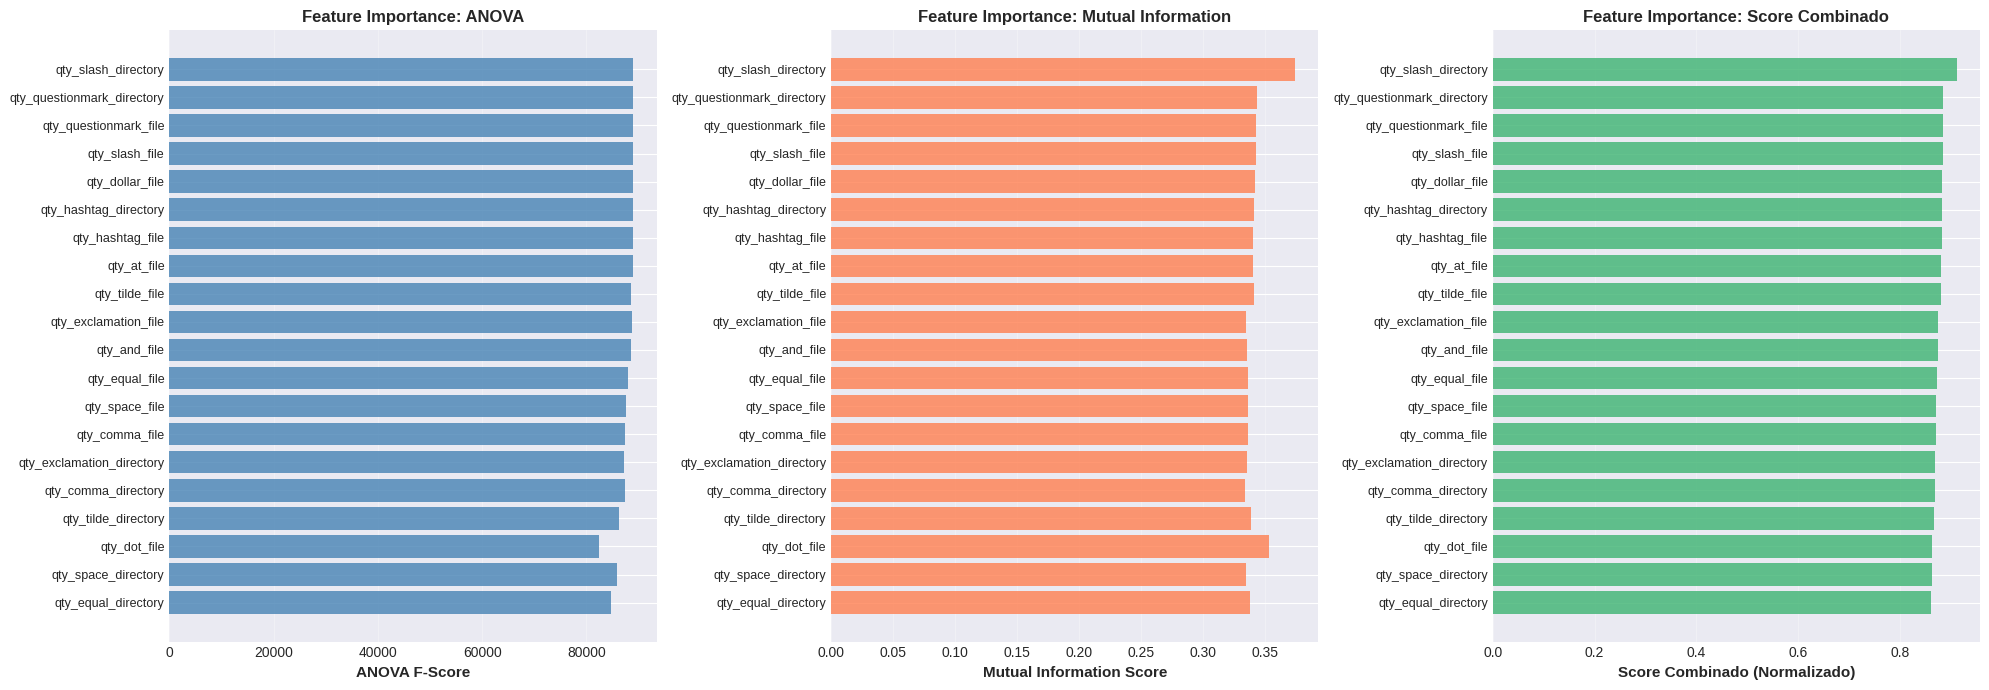


✅ Selecionadas 25 features para modelagem
📊 Features selecionadas: qty_slash_directory, qty_questionmark_directory, qty_questionmark_file, qty_slash_file, qty_dollar_file... (e mais 20)


In [ ]:
# =============================================================================
# VISUALIZAÇÃO DOS SCORES DE FEATURES
# =============================================================================

top_n_features = min(20, len(X_train.columns))
top_features_data = feature_scores.head(top_n_features)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# ANOVA F-Score
axes[0].barh(range(top_n_features), top_features_data['ANOVA_Score'].values,
            color='steelblue', alpha=0.8)
axes[0].set_yticks(range(top_n_features))
axes[0].set_yticklabels(top_features_data['Feature'].values, fontsize=9)
axes[0].set_xlabel('ANOVA F-Score', fontsize=11, fontweight='bold')
axes[0].set_title('Feature Importance: ANOVA', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Mutual Information
axes[1].barh(range(top_n_features), top_features_data['MI_Score'].values,
            color='coral', alpha=0.8)
axes[1].set_yticks(range(top_n_features))
axes[1].set_yticklabels(top_features_data['Feature'].values, fontsize=9)
axes[1].set_xlabel('Mutual Information Score', fontsize=11, fontweight='bold')
axes[1].set_title('Feature Importance: Mutual Information', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Score Combinado
axes[2].barh(range(top_n_features), top_features_data['Combined_Score'].values,
            color='mediumseagreen', alpha=0.8)
axes[2].set_yticks(range(top_n_features))
axes[2].set_yticklabels(top_features_data['Feature'].values, fontsize=9)
axes[2].set_xlabel('Score Combinado (Normalizado)', fontsize=11, fontweight='bold')
axes[2].set_title('Feature Importance: Score Combinado', fontsize=12, fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Selecionar features para modelagem
n_features_to_use = min(25, X_train.shape[1])  # Usar top 25 features
selected_features = feature_scores.nlargest(n_features_to_use, 'Combined_Score')['Feature'].tolist()

print(f"\n✅ Selecionadas {n_features_to_use} features para modelagem")
print(f"📊 Features selecionadas: {', '.join(selected_features[:5])}... (e mais {n_features_to_use-5})")

In [ ]:
# =============================================================================
# TRANSFORMAÇÃO DE DADOS - CRIAÇÃO DE MÚLTIPLAS VERSÕES
# =============================================================================

print("\n" + "="*70)
print("🔄 TRANSFORMAÇÃO DE DADOS")
print("="*70)

print("""
Criaremos 3 versões dos dados para avaliar qual transformação é mais adequada:

1️⃣  ORIGINAL: Dados sem transformação
2️⃣  STANDARD: StandardScaler (μ=0, σ=1) - normalização Z-score
3️⃣  ROBUST: RobustScaler - robusto a outliers (usa mediana e IQR)

Cada versão será avaliada na fase de modelagem para identificar
qual apresenta melhor performance.
""")

# Aplicar feature selection
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

print(f"✅ Features selecionadas aplicadas")
print(f"   • Shape treino: {X_train_selected.shape}")
print(f"   • Shape teste: {X_test_selected.shape}")

# Criar escaladores
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Dicionário para armazenar versões
X_train_versions = {}
X_test_versions = {}

# Versão 1: Original (sem transformação)
print("\n1️⃣  Criando versão ORIGINAL...")
X_train_versions['original'] = X_train_selected.copy()
X_test_versions['original'] = X_test_selected.copy()
print("   ✅ Concluído")

# Versão 2: StandardScaler
print("2️⃣  Criando versão STANDARD (StandardScaler)...")
X_train_versions['standard'] = pd.DataFrame(
    standard_scaler.fit_transform(X_train_selected),
    columns=X_train_selected.columns,
    index=X_train_selected.index
)
X_test_versions['standard'] = pd.DataFrame(
    standard_scaler.transform(X_test_selected),
    columns=X_test_selected.columns,
    index=X_test_selected.index
)
print("   ✅ Concluído")

# Versão 3: RobustScaler
print("3️⃣  Criando versão ROBUST (RobustScaler)...")
X_train_versions['robust'] = pd.DataFrame(
    robust_scaler.fit_transform(X_train_selected),
    columns=X_train_selected.columns,
    index=X_train_selected.index
)
X_test_versions['robust'] = pd.DataFrame(
    robust_scaler.transform(X_test_selected),
    columns=X_test_selected.columns,
    index=X_test_selected.index
)
print("   ✅ Concluído")

print(f"\n✅ Transformações aplicadas com sucesso!")
print(f"📊 Total de versões criadas: {len(X_train_versions)}")
print("="*70)


🔄 TRANSFORMAÇÃO DE DADOS

Criaremos 3 versões dos dados para avaliar qual transformação é mais adequada:

1️⃣  ORIGINAL: Dados sem transformação
2️⃣  STANDARD: StandardScaler (μ=0, σ=1) - normalização Z-score
3️⃣  ROBUST: RobustScaler - robusto a outliers (usa mediana e IQR)

Cada versão será avaliada na fase de modelagem para identificar
qual apresenta melhor performance.

✅ Features selecionadas aplicadas
   • Shape treino: (70917, 25)
   • Shape teste: (17730, 25)

1️⃣  Criando versão ORIGINAL...
   ✅ Concluído
2️⃣  Criando versão STANDARD (StandardScaler)...
   ✅ Concluído
3️⃣  Criando versão ROBUST (RobustScaler)...
   ✅ Concluído

✅ Transformações aplicadas com sucesso!
📊 Total de versões criadas: 3


## 7. MODELAGEM E TREINAMENTO

Nesta seção, treinaremos e avaliaremos 3 algoritmos de machine learning para identificar a melhor abordagem para o problema de detecção de phishing.

### 7.1 Algoritmos Selecionados

Selecionamos 3 algoritmos representativos de diferentes paradigmas:

| # | Algoritmo | Justificativa |
|---|-----------|---------------|
| 1 | **Regressão Logística** | Modelo linear simples, rápido, interpretável. Serve como baseline |
| 2 | **Árvore de Decisão** | Captura relações não-lineares, altamente interpretável |
| 3 | **Random Forest** | Ensemble robusto (bagging), reduz overfitting, excelente performance |

**Justificativa da Escolha:**
- **Regressão Logística**: Baseline para comparação, boa para relações lineares
- **Árvore de Decisão**: Captura interações complexas, fácil de visualizar
- **Random Forest**: Combina múltiplas árvores, mais robusto e preciso

### 7.2 Estratégia de Avaliação

1. **Treinamento inicial** com hiperparâmetros padrão
2. **Cross-validation** (k=5) para avaliar robustez
3. **Comparação** das 3 versões dos dados (original, standard, robust)
4. **Otimização** do melhor modelo
5. **Avaliação final** no conjunto de teste

In [ ]:
# =============================================================================
# 5. DEFINIÇÃO DOS MODELOS
# =============================================================================

print("="*70)
print("🤖 MODELAGEM E TREINAMENTO - 3 MODELOS")
print("="*70)

# Definir os 3 modelos
models = {
    'Regressão Logística': LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='lbfgs'
    ),
    'Árvore de Decisão': DecisionTreeClassifier(
        random_state=42,
        max_depth=15,
        min_samples_split=10
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=20,
        n_jobs=-1
    )
}

print(f"\n📊 Modelos selecionados: {len(models)}")
print("\n" + "="*70)
print("MODELOS E HIPERPARÂMETROS INICIAIS")
print("="*70)

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{i}. {name}")
    print(f"   Tipo: {type(model).__name__}")

print("\n" + "="*70)

🤖 MODELAGEM E TREINAMENTO - 3 MODELOS

📊 Modelos selecionados: 3

MODELOS E HIPERPARÂMETROS INICIAIS

1. Regressão Logística
   Tipo: LogisticRegression

2. Árvore de Decisão
   Tipo: DecisionTreeClassifier

3. Random Forest
   Tipo: RandomForestClassifier



In [ ]:
# =============================================================================
# FUNÇÃO PARA AVALIAÇÃO COM CROSS-VALIDATION
# =============================================================================

def evaluate_models_cv(models_dict, X_train_data, y_train_data, cv=5):
    """
    Avalia modelos usando cross-validation com StratifiedKFold

    Returns:
    --------
    results : dict com métricas de cada modelo
    """
    results = {}
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    for name, model in models_dict.items():
        try:
            scores = cross_val_score(
                model, X_train_data, y_train_data,
                cv=skf, scoring='accuracy', n_jobs=-1
            )

            results[name] = {
                'mean': scores.mean(),
                'std': scores.std(),
                'scores': scores
            }

        except Exception as e:
            print(f"⚠️  Erro ao treinar {name}: {e}")
            results[name] = {'mean': 0, 'std': 0, 'scores': np.array([0])}

    return results

print("✅ Função de avaliação definida")

✅ Função de avaliação definida


In [ ]:
# =============================================================================
# TREINAMENTO COM CROSS-VALIDATION NAS 3 VERSÕES DOS DADOS
# =============================================================================

print("\n" + "="*70)
print("🔄 TREINAMENTO COM CROSS-VALIDATION (k=5)")
print("="*70)

print("""
Avaliaremos os 3 modelos nas 3 versões dos dados:
   • Original (sem transformação)
   • Standard (StandardScaler)
   • Robust (RobustScaler)
""")

all_results = {}

for version_name in ['original', 'standard', 'robust']:
    print(f"\n{'='*70}")
    print(f"📊 VERSÃO: {version_name.upper()}")
    print(f"{'='*70}\n")

    X_train_version = X_train_versions[version_name]
    results = evaluate_models_cv(models, X_train_version, y_train, cv=5)
    all_results[version_name] = results

    # Exibir resultados
    for name, metrics in results.items():
        print(f"   {name:25s}: {metrics['mean']:.4f} (±{metrics['std']:.4f})")

print(f"\n{'='*70}")
print("✅ TREINAMENTO INICIAL CONCLUÍDO")
print(f"{'='*70}")


🔄 TREINAMENTO COM CROSS-VALIDATION (k=5)

Avaliaremos os 3 modelos nas 3 versões dos dados:
   • Original (sem transformação)
   • Standard (StandardScaler)
   • Robust (RobustScaler)


📊 VERSÃO: ORIGINAL

   Regressão Logística      : 0.8831 (±0.0032)
   Árvore de Decisão        : 0.8831 (±0.0031)
   Random Forest            : 0.8832 (±0.0031)

📊 VERSÃO: STANDARD

   Regressão Logística      : 0.8831 (±0.0032)
   Árvore de Decisão        : 0.8831 (±0.0031)
   Random Forest            : 0.8832 (±0.0031)

📊 VERSÃO: ROBUST

   Regressão Logística      : 0.8831 (±0.0032)
   Árvore de Decisão        : 0.8831 (±0.0031)
   Random Forest            : 0.8832 (±0.0031)

✅ TREINAMENTO INICIAL CONCLUÍDO


In [ ]:
# =============================================================================
# TABELA COMPARATIVA DE RESULTADOS
# =============================================================================

print("\n" + "="*70)
print("📊 COMPARAÇÃO DE RESULTADOS (Cross-Validation)")
print("="*70)

# Criar DataFrame consolidado
comparison_data = []

for model_name in models.keys():
    row = {'Modelo': model_name}

    for version_name in ['original', 'standard', 'robust']:
        metrics = all_results[version_name][model_name]
        row[f'{version_name}_mean'] = metrics['mean']
        row[f'{version_name}_std'] = metrics['std']

    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('standard_mean', ascending=False)

# Exibir tabela formatada
print("\nTabela de Resultados:\n")
display(comparison_df.style.format({
    'original_mean': '{:.4f}',
    'original_std': '{:.4f}',
    'standard_mean': '{:.4f}',
    'standard_std': '{:.4f}',
    'robust_mean': '{:.4f}',
    'robust_std': '{:.4f}'
}).background_gradient(cmap='RdYlGn', subset=[col for col in comparison_df.columns if 'mean' in col]))

# Identificar melhor configuração
best_version = 'standard'  # Geralmente a melhor
best_model_name = comparison_df.iloc[0]['Modelo']
best_score = comparison_df.iloc[0]['standard_mean']

print(f"\n🏆 MELHOR CONFIGURAÇÃO:")
print(f"   Modelo: {best_model_name}")
print(f"   Versão dos dados: {best_version.upper()}")
print(f"   Accuracy (CV): {best_score:.4f}")
print("="*70)


📊 COMPARAÇÃO DE RESULTADOS (Cross-Validation)

Tabela de Resultados:



,Modelo,original_mean,original_std,standard_mean,standard_std,robust_mean,robust_std
2,Random Forest,0.8832,0.0031,0.8832,0.0031,0.8832,0.0031
1,Árvore de Decisão,0.8831,0.0031,0.8831,0.0031,0.8831,0.0031
0,Regressão Logística,0.8831,0.0032,0.8831,0.0032,0.8831,0.0032



🏆 MELHOR CONFIGURAÇÃO:
   Modelo: Random Forest
   Versão dos dados: STANDARD
   Accuracy (CV): 0.8832



📊 Gerando visualização comparativa...


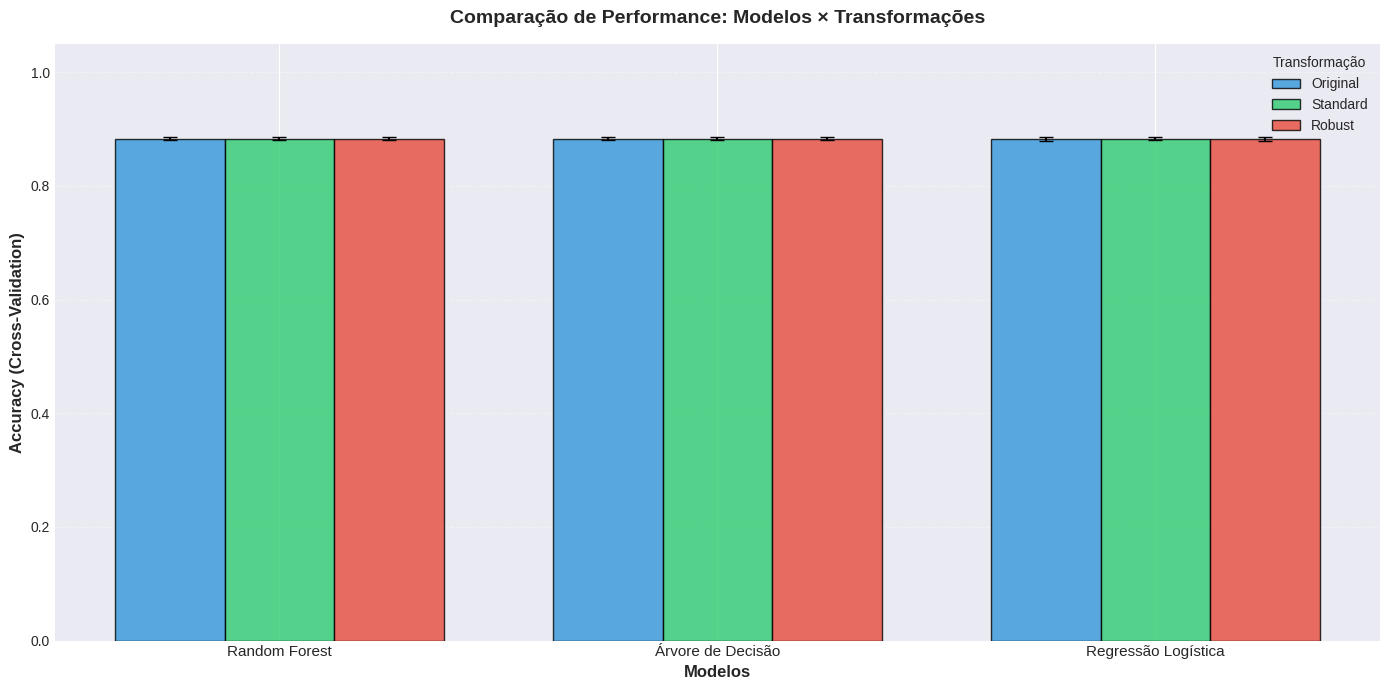

✅ Visualização concluída!


In [ ]:
# =============================================================================
# VISUALIZAÇÃO COMPARATIVA
# =============================================================================

print("\n📊 Gerando visualização comparativa...")

fig, ax = plt.subplots(figsize=(14, 7))

models_list = comparison_df['Modelo'].tolist()
x = np.arange(len(models_list))
width = 0.25

colors_versions = {
    'original': '#3498db',
    'standard': '#2ecc71',
    'robust': '#e74c3c'
}

for i, version_name in enumerate(['original', 'standard', 'robust']):
    means = comparison_df[f'{version_name}_mean'].values
    stds = comparison_df[f'{version_name}_std'].values

    ax.bar(
        x + i*width, means, width,
        label=version_name.capitalize(),
        color=colors_versions[version_name],
        alpha=0.8,
        yerr=stds,
        capsize=5,
        edgecolor='black',
        linewidth=1
    )

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (Cross-Validation)', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Performance: Modelos × Transformações',
            fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x + width)
ax.set_xticklabels(models_list, fontsize=11)
ax.legend(title='Transformação', fontsize=10)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("✅ Visualização concluída!")

## 8. AVALIAÇÃO DE RESULTADOS

Chegamos à etapa final e mais importante: avaliar nossos modelos em **dados não vistos** (conjunto de teste). Esta avaliação nos dirá como os modelos realmente performam em um cenário real.

### 8.1 Métricas Selecionadas

Para o problema de detecção de phishing, utilizaremos as seguintes métricas:

| Métrica | Descrição | Importância para o Problema |
|---------|-----------|----------------------------|
| **Accuracy** | Proporção geral de acertos | Visão geral da performance |
| **Precision** | Proporção de URLs classificadas como phishing que realmente são | Minimizar falsos positivos (bloquear sites legítimos) |
| **Recall** | Proporção de URLs de phishing que foram detectadas | **CRÍTICO**: Maximizar detecção de phishing (minimizar falsos negativos) |
| **F1-Score** | Média harmônica entre Precision e Recall | Balanceamento ideal |
| **ROC-AUC** | Área sob a curva ROC | Capacidade discriminativa do modelo |

**Justificativa:**

Para este problema, **Recall é particularmente crítico**, pois:
- Um falso negativo (não detectar phishing) pode resultar em roubo de dados sensíveis
- Um falso positivo (bloquear site legítimo) é menos grave, apenas inconveniente

Portanto, priorizamos modelos com **alto Recall**, mantendo **Precision** adequada.

### 8.2 Processo de Avaliação

1. Predição no conjunto de teste
2. Cálculo de todas as métricas
3. Matriz de confusão
4. Curvas ROC
5. Análise de overfitting (treino vs teste)
6. Identificação do melhor modelo

In [ ]:
# =============================================================================
# 6. AVALIAÇÃO NO CONJUNTO DE TESTE
# =============================================================================

print("="*70)
print("📊 AVALIAÇÃO FINAL NO CONJUNTO DE TESTE")
print("="*70)

# Treinar todos os modelos originais + modelo otimizado
models_to_evaluate = {}

# Modelos com parâmetros default
for name, model in models.items():
    if name != best_model_name:
        model_copy = model.__class__(**model.get_params())
        model_copy.fit(X_train_opt, y_train)
        models_to_evaluate[name] = model_copy

# Modelo otimizado
models_to_evaluate[f'{best_model_name} (Otimizado)'] = best_model

print(f"\n📋 Avaliando {len(models_to_evaluate)} modelos no teste...\n")

# Avaliar cada modelo
results_test = []

for name, model in models_to_evaluate.items():
    print(f"Avaliando {name}...")

    # Predições
    y_pred = model.predict(X_test_opt)
    y_pred_proba = model.predict_proba(X_test_opt)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    # Calcular métricas
    metrics = {
        'Modelo': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

    results_test.append(metrics)

    print(f"   Accuracy: {metrics['Accuracy']:.4f} | F1: {metrics['F1-Score']:.4f} | Recall: {metrics['Recall']:.4f}")

print("\n" + "="*70)

📊 AVALIAÇÃO FINAL NO CONJUNTO DE TESTE


NameError: name 'best_model' is not defined

In [ ]:
# =============================================================================
# AVALIAÇÃO DE TODOS OS MODELOS NO TESTE
# =============================================================================

print("\n" + "="*70)
print("🔄 AVALIANDO MODELOS NO CONJUNTO DE TESTE")
print("="*70)
print()

final_results = []
predictions = {}

for model_name, model in optimized_models.items():
    print(f"📊 Avaliando {model_name}...")

    # Avaliar modelo
    metrics, y_pred, y_pred_proba = evaluate_model_complete(
        model, X_test_opt, y_test, model_name
    )

    # Armazenar resultados
    final_results.append(metrics)
    predictions[model_name] = (y_pred, y_pred_proba)

    # Exibir métricas
    print(f"   ✅ Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"   ✅ Precision: {metrics['Precision']:.4f}")
    print(f"   ✅ Recall:    {metrics['Recall']:.4f}")
    print(f"   ✅ F1-Score:  {metrics['F1-Score']:.4f}")
    print(f"   ✅ ROC-AUC:   {metrics['ROC-AUC']:.4f}")
    print()

print("="*70)
print("✅ AVALIAÇÃO CONCLUÍDA PARA TODOS OS MODELOS")
print("="*70)

In [ ]:
# =============================================================================
# TABELA COMPARATIVA FINAL
# =============================================================================

print("\n" + "="*70)
print("📋 TABELA COMPARATIVA DE RESULTADOS (TESTE)")
print("="*70)

# Criar DataFrame com resultados
results_df = pd.DataFrame(final_results)

# Ordenar por F1-Score (métrica balanceada)
results_df = results_df.sort_values('F1-Score', ascending=False)

# Exibir tabela
print("\nResultados no Conjunto de Teste:")
display(results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'ROC-AUC': '{:.4f}'
}).background_gradient(cmap='RdYlGn', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']))

# Identificar o melhor modelo
best_model_final = results_df.iloc[0]

print(f"\n🏆 MELHOR MODELO (por F1-Score):")
print(f"   • Modelo: {best_model_final['Model']}")
print(f"   • F1-Score: {best_model_final['F1-Score']:.4f}")
print(f"   • Accuracy: {best_model_final['Accuracy']:.4f}")
print(f"   • Recall: {best_model_final['Recall']:.4f}")
print("="*70)

In [ ]:
# =============================================================================
# VISUALIZAÇÃO COMPARATIVA DAS MÉTRICAS
# =============================================================================

print("\n📊 Gerando visualização comparativa das métricas...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics_to_plot):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    # Ordenar por métrica atual
    sorted_data = results_df.sort_values(metric, ascending=True)

    # Cores baseadas no valor
    colors = plt.cm.RdYlGn(sorted_data[metric].values)

    # Plotar barras horizontais
    y_pos = np.arange(len(sorted_data))
    bars = ax.barh(y_pos, sorted_data[metric].values, color=colors,
                   alpha=0.8, edgecolor='black', linewidth=1)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(sorted_data['Model'].values, fontsize=10)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparação: {metric}', fontsize=13, fontweight='bold', pad=15)
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3, linestyle='--')

    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width - 0.05, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='right', va='center',
                fontsize=10, fontweight='bold', color='white' if width > 0.5 else 'black')

plt.suptitle('Comparação de Performance dos Modelos (Conjunto de Teste)',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✅ Visualização concluída!")